In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/train_features.csv")
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,...,target_6_days_ago,target_7_days_ago,target_8_days_ago,target_9_days_ago,target_10_days_ago,target_11_days_ago,target_12_days_ago,target_13_days_ago,target_14_days_ago,target_15_days_ago
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

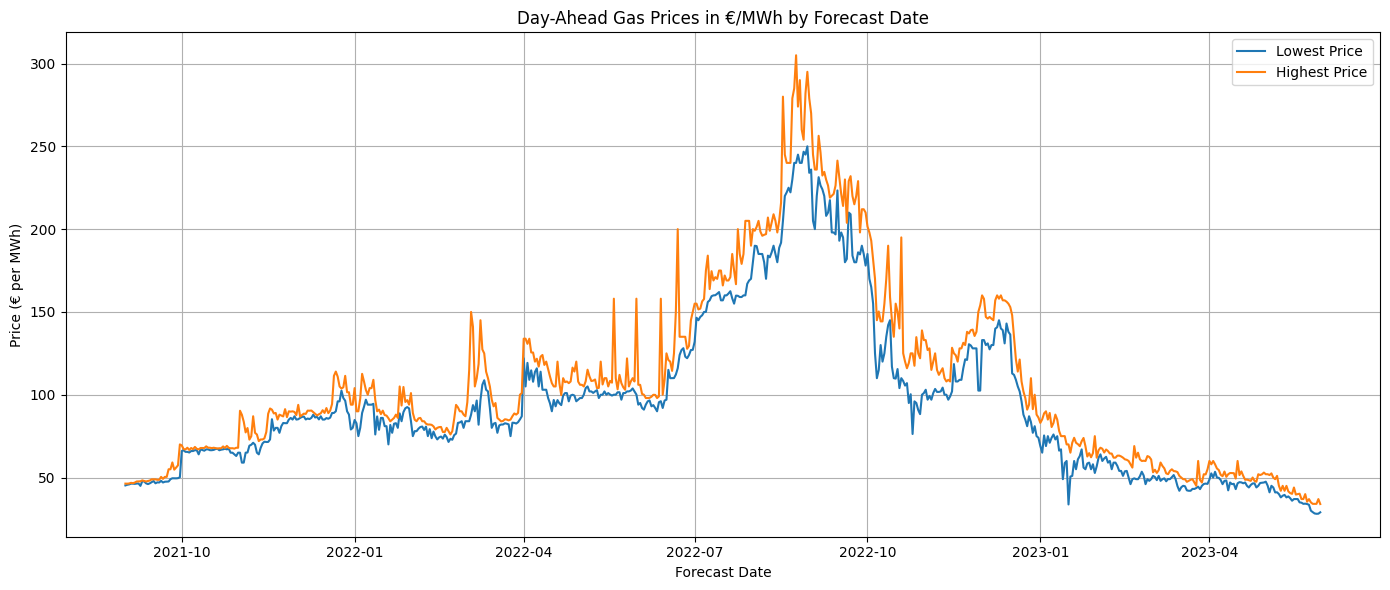

In [6]:
# Load the CSV file
df_gas = pd.read_csv("gas_prices.csv", parse_dates=["forecast_date"])

# Sort by forecast_date just in case
df_gas.sort_values("forecast_date", inplace=True)

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_gas, x="forecast_date", y="lowest_price_per_mwh", label="Lowest Price")
sns.lineplot(data=df_gas, x="forecast_date", y="highest_price_per_mwh", label="Highest Price")

plt.title("Day-Ahead Gas Prices in €/MWh by Forecast Date")
plt.xlabel("Forecast Date")
plt.ylabel("Price (€ per MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# Load the CSV file
df_for_weather = pd.read_csv("forecast_weather.csv")

df_for_weather.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 02:00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 02:00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 02:00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 02:00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 02:00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 03:00:00,0.0,0.0,0.0,0.0


In [4]:
print(df_for_weather.columns)

Index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead',
       'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'data_block_id', 'forecast_datetime',
       'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation'],
      dtype='object')


In [7]:
merged_df = df_for_weather.merge(df_gas, on="data_block_id", how="left")


/Users/sadhvinarayanan/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


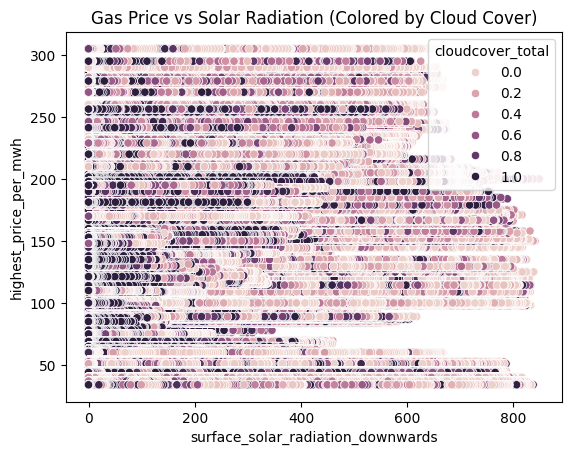

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=merged_df,
    x="surface_solar_radiation_downwards",
    y="highest_price_per_mwh",
    hue="cloudcover_total"
)
plt.title("Gas Price vs Solar Radiation (Colored by Cloud Cover)")
plt.show()


In [ ]:
df1 = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2021_daily.csv")
df2 = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2022_daily.csv")
df3 = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2023_daily.csv")
df4 = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2024_daily.csv")

In [20]:
import pandas as pd

# Define the correct column names, ensuring the first column is correctly accounted for
columns = ['Datetime (UTC)', 'Country', 'Zone name', 'Zone id', 
           'Carbon intensity gCO₂eq/kWh (direct)', 'Carbon intensity gCO₂eq/kWh (Life cycle)', 
           'Carbon-free energy percentage (CFE%)', 'Renewable energy percentage (RE%)', 'Data source']

# Read the CSV with no header and set the column names, skipping the first row
df_2021 = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2021_daily.csv", 
                      header=None, names=columns, skiprows=0)


ParserError: Error tokenizing data. C error: Expected 9 fields in line 2, saw 11


In [32]:
estonia_2021 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2021_daily.xlsx")
estonia_2022 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2022_daily.xlsx")
estonia_2023 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2023_daily.xlsx")
estonia_2024 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2024_daily.xlsx")



In [34]:
latvia_2021 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LV_2021_daily.xlsx")
latvia_2022 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LV_2022_daily.xlsx")
latvia_2023 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LV_2023_daily.xlsx")
latvia_2024 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LV_2024_daily.xlsx")

In [36]:
lithuania_2021 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LT_2021_daily.xlsx")
lithuania_2022 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LT_2022_daily.xlsx")
lithuania_2023 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LT_2023_daily.xlsx")
lithuania_2024 = pd.read_excel("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/LT_2024_daily.xlsx")

In [40]:
estonia_all_years = pd.concat([estonia_2021, estonia_2022, estonia_2023, estonia_2024], ignore_index=True)
estonia_all_years.head()

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO‚ÇÇeq/kWh (direct),Carbon intensity gCO‚ÇÇeq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
0,2021-01-01,Estonia,Estonia,EE,236.34,290.34,64.53,40.08,entsoe.eu
1,2021-01-02,Estonia,Estonia,EE,278.44,333.54,60.28,37.84,entsoe.eu
2,2021-01-03,Estonia,Estonia,EE,259.36,314.01,62.12,39.38,entsoe.eu
3,2021-01-04,Estonia,Estonia,EE,356.07,410.65,49.19,30.82,entsoe.eu
4,2021-01-05,Estonia,Estonia,EE,382.41,431.06,45.09,28.40,entsoe.eu


In [39]:
latvia_all_years = pd.concat([latvia_2021, latvia_2022, latvia_2023, latvia_2024], ignore_index=True)
latvia_all_years.head()

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO‚ÇÇeq/kWh (direct),Carbon intensity gCO‚ÇÇeq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
0,2021-01-01,Latvia,Latvia,LV,220.84,297.77,57.73,46.22,entsoe.eu
1,2021-01-02,Latvia,Latvia,LV,213.26,266.53,63.92,52.54,entsoe.eu
2,2021-01-03,Latvia,Latvia,LV,235.99,294.67,60.86,46.49,entsoe.eu
3,2021-01-04,Latvia,Latvia,LV,217.94,274.30,60.88,52.85,entsoe.eu
4,2021-01-05,Latvia,Latvia,LV,267.72,338.56,48.79,42.56,entsoe.eu


In [38]:
lithuania_all_years = pd.concat([lithuania_2021, lithuania_2022, lithuania_2023, lithuania_2024], ignore_index=True)
lithuania_all_years.head()

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO‚ÇÇeq/kWh (direct),Carbon intensity gCO‚ÇÇeq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
0,2021-01-01,Lithuania,Lithuania,LT,243.16,332.29,43.87,31.68,entsoe.eu
1,2021-01-02,Lithuania,Lithuania,LT,251.96,338.17,42.17,31.40,entsoe.eu
2,2021-01-03,Lithuania,Lithuania,LT,196.95,277.60,50.55,34.01,entsoe.eu
3,2021-01-04,Lithuania,Lithuania,LT,216.91,294.03,51.60,39.65,entsoe.eu
4,2021-01-05,Lithuania,Lithuania,LT,232.78,309.09,50.96,41.48,entsoe.eu


In [49]:
all_countries_data = pd.concat([estonia_all_years, latvia_all_years, lithuania_all_years], ignore_index=True)
all_countries_data.head()

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO‚ÇÇeq/kWh (direct),Carbon intensity gCO‚ÇÇeq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
0,2021-01-01,Estonia,Estonia,EE,236.34,290.34,64.53,40.08,entsoe.eu
1,2021-01-02,Estonia,Estonia,EE,278.44,333.54,60.28,37.84,entsoe.eu
2,2021-01-03,Estonia,Estonia,EE,259.36,314.01,62.12,39.38,entsoe.eu
3,2021-01-04,Estonia,Estonia,EE,356.07,410.65,49.19,30.82,entsoe.eu
4,2021-01-05,Estonia,Estonia,EE,382.41,431.06,45.09,28.40,entsoe.eu


In [47]:
all_countries_data.columns

Index(['Datetime (UTC)', 'Country', 'Zone name', 'Zone id',
       'Carbon intensity gCO‚ÇÇeq/kWh (direct)',
       'Carbon intensity gCO‚ÇÇeq/kWh (Life cycle)',
       'Carbon-free energy percentage (CFE%)',
       'Renewable energy percentage (RE%)', 'Data source'],
      dtype='object')

In [50]:
carbon_countries = all_countries_data.drop('Zone name', axis=1)
carbon_countries.head()


,Datetime (UTC),Country,Zone id,Carbon intensity gCO‚ÇÇeq/kWh (direct),Carbon intensity gCO‚ÇÇeq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
0,2021-01-01,Estonia,EE,236.34,290.34,64.53,40.08,entsoe.eu
1,2021-01-02,Estonia,EE,278.44,333.54,60.28,37.84,entsoe.eu
2,2021-01-03,Estonia,EE,259.36,314.01,62.12,39.38,entsoe.eu
3,2021-01-04,Estonia,EE,356.07,410.65,49.19,30.82,entsoe.eu
4,2021-01-05,Estonia,EE,382.41,431.06,45.09,28.40,entsoe.eu


In [ ]:
carbon_countries.to_csv("carbon_intensity_countries.csv", index=False)
# THIS ENDS THE SERIES OF THE GOOD DATA

In [55]:
transmission_data = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/transmission_other/transmission.csv")
transmission_data.head()



,MTU,Out Area,In Area,Physical Flow (MW)
0,01/01/2021,BZN|BY,BZN|LT,9569.0
1,01/01/2021,BZN|EE,BZN|FI,0.0
2,01/01/2021,BZN|EE,BZN|LV,4883.8
3,01/01/2021,BZN|EE,BZN|RU,1821.4
4,01/01/2021,BZN|FI,BZN|EE,20990.0


In [56]:
# Assuming the column you want to modify is named 'column_name'
transmission_data['Out Area'] = transmission_data['Out Area'].str.replace('BZN|', '', regex=False)
transmission_data['In Area'] = transmission_data['In Area'].str.replace('BZN|', '', regex=False)

# Display the updated DataFrame
transmission_data.head()

,MTU,Out Area,In Area,Physical Flow (MW)
0,01/01/2021,BY,LT,9569.0
1,01/01/2021,EE,FI,0.0
2,01/01/2021,EE,LV,4883.8
3,01/01/2021,EE,RU,1821.4
4,01/01/2021,FI,EE,20990.0


In [ ]:
# Define the list of specific values
specific_values = ['EE', 'LV', 'LT']

# Filter rows where both 'Out Area' and 'In Area' are in the specific values
filtered_data = transmission_data[
    (transmission_data['Out Area'].isin(specific_values)) & 
    (transmission_data['In Area'].isin(specific_values))
]

# Display the filtered DataFrame
filtered_data.head()

,MTU,Out Area,In Area,Physical Flow (MW)
2,01/01/2021,EE,LV,4883.8
6,01/01/2021,LT,LV,3856.5
10,01/01/2021,LV,EE,0.0
11,01/01/2021,LV,LT,799.5
20,01/01/2022,EE,LV,3989.3


In [61]:
filtered_data.to_csv("filtered_transmission_data.csv", index=False)

In [68]:
import pandas as pd

# Load generation data
generation_df = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/transmission_other/baltic_energy_type.csv")  # replace with actual path
generation_df['MTU'] = pd.to_datetime(generation_df['MTU (CET/CEST)'], dayfirst=True)
generation_df = generation_df.drop(columns=['MTU (CET/CEST)'])

# Load flow data
flow_df = pd.read_csv("/Users/sadhvinarayanan/5c-Datathon-2025/transmission_other/transmission.csv")  # replace with actual path
flow_df['MTU'] = pd.to_datetime(flow_df['MTU'], dayfirst=True)



In [69]:
# Sum total generation per country per day
gen_by_country = generation_df.groupby(['MTU', 'Area'])['Generation (MW)'].sum().reset_index()
gen_by_country = gen_by_country.rename(columns={'Generation (MW)': 'Total_Generation_MW'})


In [75]:
gen_by_country.head()

,MTU,Area,Total_Generation_MW
0,2021-01-01,Estonia,6967.60
1,2021-01-01,Latvia,8113.00
2,2021-01-01,Lithuania,6632.14
3,2021-01-02,Estonia,10609.30
4,2021-01-02,Latvia,12558.00


In [70]:
# Total exports per country (Out Area = country)
exports = flow_df.groupby(['MTU', 'Out Area'])['Physical Flow (MW)'].sum().reset_index()
exports = exports.rename(columns={'Out Area': 'Area', 'Physical Flow (MW)': 'Total_Exports_MW'})

# Total imports per country (In Area = country)
imports = flow_df.groupby(['MTU', 'In Area'])['Physical Flow (MW)'].sum().reset_index()
imports = imports.rename(columns={'In Area': 'Area', 'Physical Flow (MW)': 'Total_Imports_MW'})

# Merge exports and imports
flows = pd.merge(exports, imports, on=['MTU', 'Area'], how='outer')
flows = flows.fillna(0)  # Replace NaNs with 0 for missing flows

# Calculate net flow
flows['Net_Flow_MW'] = flows['Total_Imports_MW'] - flows['Total_Exports_MW']


In [76]:
flows.head()

,MTU,Area,Total_Exports_MW,Total_Imports_MW,Net_Flow_MW
0,2021-01-01,BZN|BY,9569.00,0.00,-9569.0
1,2021-01-01,BZN|EE,6705.20,21299.20,14594.0
2,2021-01-01,BZN|FI,20990.00,0.00,-20990.0
3,2021-01-01,BZN|LT,4218.65,27109.55,22890.9
4,2021-01-01,BZN|LV,799.50,9796.30,8996.8


In [78]:
# Assuming the column you want to modify is named 'column_name'
flows['Area'] = flows['Area'].str.replace('BZN|', '', regex=False)
flows['Area'] = flows['Area'].str.replace('BZN|', '', regex=False)
specific_values = ['EE', 'LV', 'LT']

# Filter rows where both 'Out Area' and 'In Area' are in the specific values
new_flows = flows[
    (flows['Area'].isin(specific_values)) & 
    (flows['Area'].isin(specific_values))
]

new_flows.head()

,MTU,Area,Total_Exports_MW,Total_Imports_MW,Net_Flow_MW
1,2021-01-01,EE,6705.20,21299.20,14594.00
3,2021-01-01,LT,4218.65,27109.55,22890.90
4,2021-01-01,LV,799.50,9796.30,8996.80
10,2021-01-02,EE,10509.15,22629.68,12120.53
12,2021-01-02,LT,4061.32,31811.32,27750.00


In [79]:
replace_dict = {
    "EE": "Estonia",
    "LV": "Latvia",
    "LT": "Lithuania"
}

new_flows["Area"] = new_flows["Area"].replace(replace_dict)
new_flows.head()


/var/folders/0p/8r5lt5rs1j520yctvhqcftp80000gn/T/ipykernel_7319/1201964435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_flows["Area"] = new_flows["Area"].replace(replace_dict)


,MTU,Area,Total_Exports_MW,Total_Imports_MW,Net_Flow_MW
1,2021-01-01,Estonia,6705.20,21299.20,14594.00
3,2021-01-01,Lithuania,4218.65,27109.55,22890.90
4,2021-01-01,Latvia,799.50,9796.30,8996.80
10,2021-01-02,Estonia,10509.15,22629.68,12120.53
12,2021-01-02,Lithuania,4061.32,31811.32,27750.00


In [80]:
# Merge generation with flow data
combined_df = pd.merge(gen_by_country, new_flows, on=['MTU', 'Area'], how='outer')
combined_df = combined_df.fillna(0)
combined_df.head()


,MTU,Area,Total_Generation_MW,Total_Exports_MW,Total_Imports_MW,Net_Flow_MW
0,2021-01-01,Estonia,6967.60,6705.20,21299.20,14594.00
1,2021-01-01,Latvia,8113.00,799.50,9796.30,8996.80
2,2021-01-01,Lithuania,6632.14,4218.65,27109.55,22890.90
3,2021-01-02,Estonia,10609.30,10509.15,22629.68,12120.53
4,2021-01-02,Latvia,12558.00,6276.00,11509.35,5233.35


In [81]:
# Add indicators
combined_df['Self_Sufficiency_Ratio'] = combined_df['Total_Generation_MW'] / (
    combined_df['Total_Generation_MW'] + combined_df['Total_Imports_MW']
)

combined_df['Dependency_Ratio'] = combined_df['Total_Imports_MW'] / (
    combined_df['Total_Generation_MW'] + combined_df['Total_Imports_MW']
)


In [82]:
combined_df.head()

,MTU,Area,Total_Generation_MW,Total_Exports_MW,Total_Imports_MW,Net_Flow_MW,Self_Sufficiency_Ratio,Dependency_Ratio
0,2021-01-01,Estonia,6967.60,6705.20,21299.20,14594.00,0.246494,0.753506
1,2021-01-01,Latvia,8113.00,799.50,9796.30,8996.80,0.453005,0.546995
2,2021-01-01,Lithuania,6632.14,4218.65,27109.55,22890.90,0.196556,0.803444
3,2021-01-02,Estonia,10609.30,10509.15,22629.68,12120.53,0.319182,0.680818
4,2021-01-02,Latvia,12558.00,6276.00,11509.35,5233.35,0.521786,0.478214


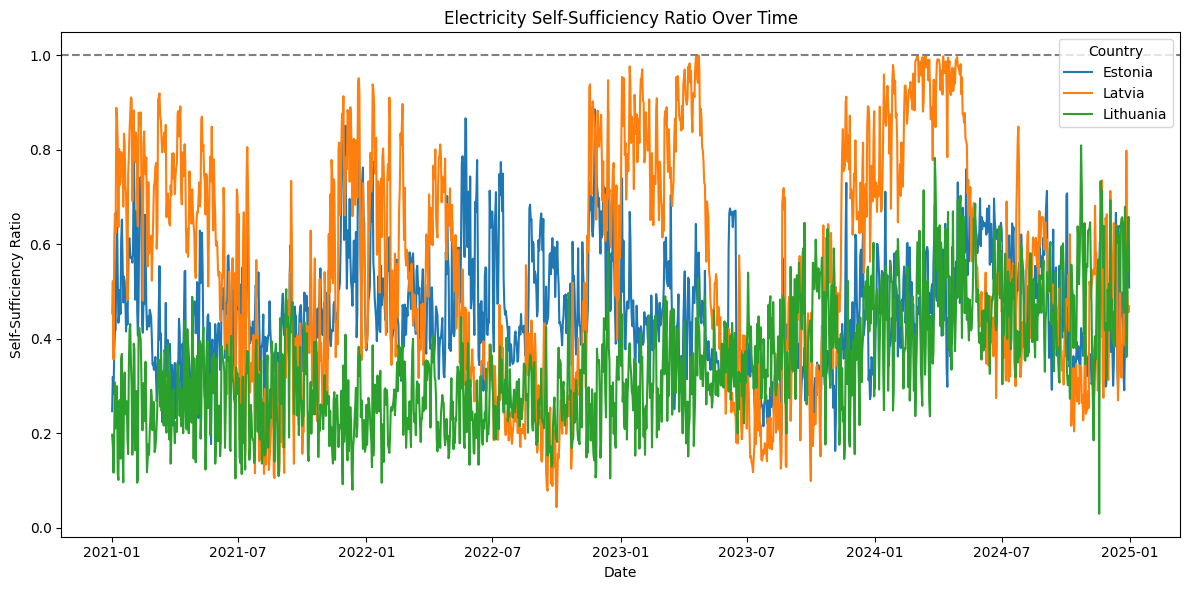

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='MTU', y='Self_Sufficiency_Ratio', hue='Area')
plt.title('Electricity Self-Sufficiency Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Self-Sufficiency Ratio')
plt.axhline(1, linestyle='--', color='gray')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


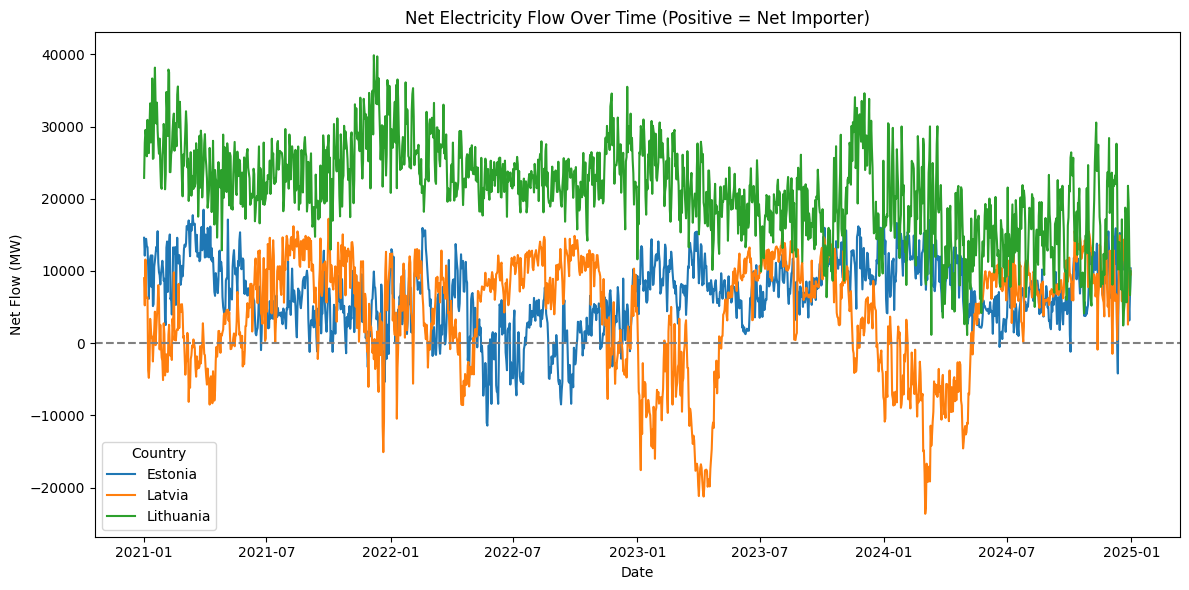

In [84]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='MTU', y='Net_Flow_MW', hue='Area')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Net Electricity Flow Over Time (Positive = Net Importer)')
plt.xlabel('Date')
plt.ylabel('Net Flow (MW)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


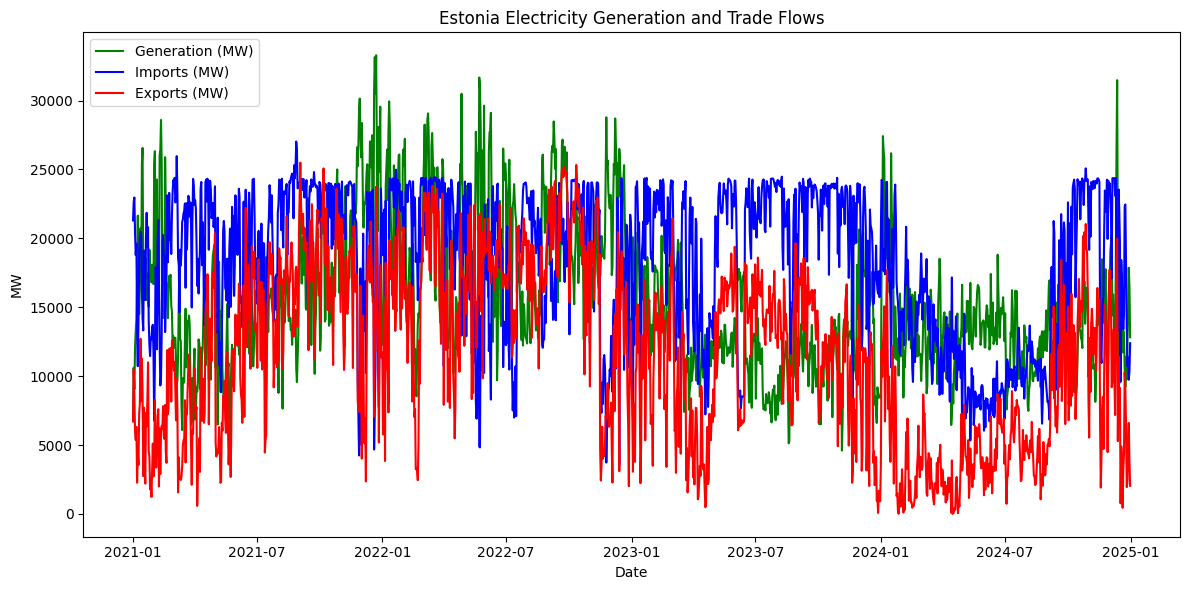

In [86]:
estonia_df = combined_df[combined_df['Area'] == 'Estonia']

plt.figure(figsize=(12, 6))
plt.plot(estonia_df['MTU'], estonia_df['Total_Generation_MW'], label='Generation (MW)', color='green')
plt.plot(estonia_df['MTU'], estonia_df['Total_Imports_MW'], label='Imports (MW)', color='blue')
plt.plot(estonia_df['MTU'], estonia_df['Total_Exports_MW'], label='Exports (MW)', color='red')
plt.title('Estonia Electricity Generation and Trade Flows')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

estonia_df = combined_df[combined_df['Area'] == 'Estonia']
# Make sure MTU is datetime
estonia_df['MTU'] = pd.to_datetime(estonia_df['MTU'])

# Create interactive plot
fig = go.Figure()

# Add Generation trace
fig.add_trace(go.Scatter(
    x=estonia_df['MTU'],
    y=estonia_df['Total_Generation_MW'],
    mode='lines',
    name='Generation (MW)',
    line=dict(color='green')
))

# Add Imports trace
fig.add_trace(go.Scatter(
    x=estonia_df['MTU'],
    y=estonia_df['Total_Imports_MW'],
    mode='lines',
    name='Imports (MW)',
    line=dict(color='blue')
))

# Add Exports trace
fig.add_trace(go.Scatter(
    x=estonia_df['MTU'],
    y=estonia_df['Total_Exports_MW'],
    mode='lines',
    name='Exports (MW)',
    line=dict(color='red')
))

# Layout with slider
fig.update_layout(
    title='Estonia Electricity Generation and Trade Flows',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=7, label='1w', step='day', stepmode='backward'),
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='MW'),
    template='plotly_white'
)

fig.show()


/var/folders/0p/8r5lt5rs1j520yctvhqcftp80000gn/T/ipykernel_7319/4616694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estonia_df['MTU'] = pd.to_datetime(estonia_df['MTU'])


In [88]:
import plotly.graph_objs as go
import plotly.express as px

latvia_df = combined_df[combined_df['Area'] == 'Latvia']
# Make sure MTU is datetime
latvia_df['MTU'] = pd.to_datetime(latvia_df['MTU'])

# Create interactive plot
fig = go.Figure()

# Add Generation trace
fig.add_trace(go.Scatter(
    x=latvia_df['MTU'],
    y=latvia_df['Total_Generation_MW'],
    mode='lines',
    name='Generation (MW)',
    line=dict(color='green')
))

# Add Imports trace
fig.add_trace(go.Scatter(
    x=latvia_df['MTU'],
    y=latvia_df['Total_Imports_MW'],
    mode='lines',
    name='Imports (MW)',
    line=dict(color='blue')
))

# Add Exports trace
fig.add_trace(go.Scatter(
    x=latvia_df['MTU'],
    y=latvia_df['Total_Exports_MW'],
    mode='lines',
    name='Exports (MW)',
    line=dict(color='red')
))

# Layout with slider
fig.update_layout(
    title='Latvia Electricity Generation and Trade Flows',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=7, label='1w', step='day', stepmode='backward'),
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='MW'),
    template='plotly_white'
)

fig.show()


/var/folders/0p/8r5lt5rs1j520yctvhqcftp80000gn/T/ipykernel_7319/1747895974.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
import plotly.graph_objs as go
import plotly.express as px

lithuania_df = combined_df[combined_df['Area'] == 'Lithuania']
# Make sure MTU is datetime
lithuania_df['MTU'] = pd.to_datetime(lithuania_df['MTU'])

# Create interactive plot
fig = go.Figure()

# Add Generation trace
fig.add_trace(go.Scatter(
    x=lithuania_df['MTU'],
    y=lithuania_df['Total_Generation_MW'],
    mode='lines',
    name='Generation (MW)',
    line=dict(color='green')
))

# Add Imports trace
fig.add_trace(go.Scatter(
    x=lithuania_df['MTU'],
    y=lithuania_df['Total_Imports_MW'],
    mode='lines',
    name='Imports (MW)',
    line=dict(color='blue')
))

# Add Exports trace
fig.add_trace(go.Scatter(
    x=lithuania_df['MTU'],
    y=lithuania_df['Total_Exports_MW'],
    mode='lines',
    name='Exports (MW)',
    line=dict(color='red')
))

# Layout with slider
fig.update_layout(
    title='Lithuania Electricity Generation and Trade Flows',
    xaxis=dict(
        title='Date',
        rangeselector=dict(
            buttons=list([
                dict(count=7, label='1w', step='day', stepmode='backward'),
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(title='MW'),
    template='plotly_white'
)

fig.show()


/var/folders/0p/8r5lt5rs1j520yctvhqcftp80000gn/T/ipykernel_7319/521954355.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



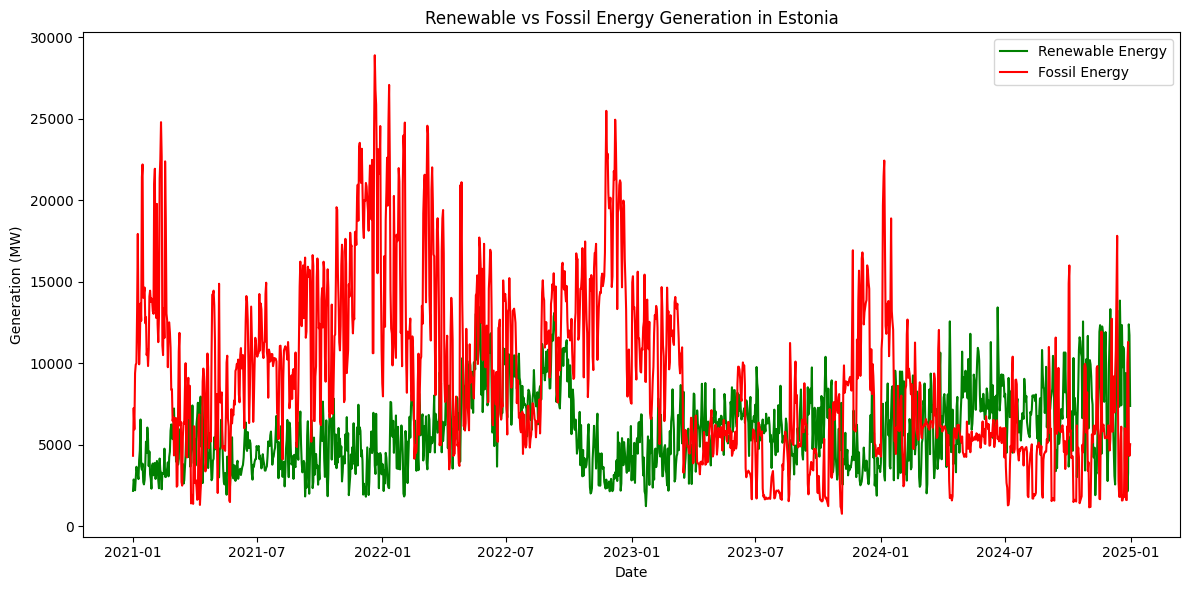

In [91]:
es_df= generation_df[generation_df["Area"] == "Estonia"]
renewable_types = ['Solar', 'Wind Onshore', 'Biomass', 'Hydro Run-of-river and poundage']
fossil_types = ['Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Oil shale', 'Fossil Peat']

# Filter data for renewable and fossil generation types
renewable_df = es_df[es_df['Production Type'].isin(renewable_types)]
fossil_df = es_df[es_df['Production Type'].isin(fossil_types)]

# Summarize generation data by date
renewable_sum = renewable_df.groupby('MTU')['Generation (MW)'].sum()
fossil_sum = fossil_df.groupby('MTU')['Generation (MW)'].sum()

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(renewable_sum, label='Renewable Energy', color='green')
plt.plot(fossil_sum, label='Fossil Energy', color='red')
plt.title('Renewable vs Fossil Energy Generation in Estonia')
plt.xlabel('Date')
plt.ylabel('Generation (MW)')
plt.legend()
plt.tight_layout()
plt.show()


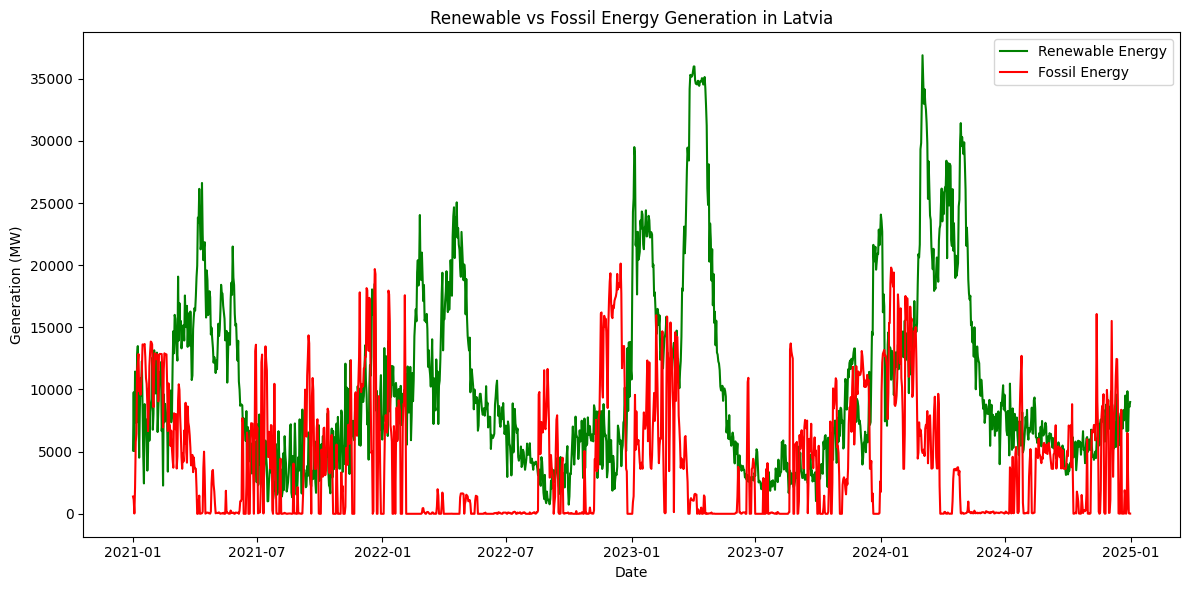

In [92]:
lv_df= generation_df[generation_df["Area"] == "Latvia"]
renewable_types = ['Solar', 'Wind Onshore', 'Biomass', 'Hydro Run-of-river and poundage']
fossil_types = ['Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Oil shale', 'Fossil Peat']

# Filter data for renewable and fossil generation types
renewable_df = lv_df[lv_df['Production Type'].isin(renewable_types)]
fossil_df = lv_df[lv_df['Production Type'].isin(fossil_types)]

# Summarize generation data by date
renewable_sum = renewable_df.groupby('MTU')['Generation (MW)'].sum()
fossil_sum = fossil_df.groupby('MTU')['Generation (MW)'].sum()

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(renewable_sum, label='Renewable Energy', color='green')
plt.plot(fossil_sum, label='Fossil Energy', color='red')
plt.title('Renewable vs Fossil Energy Generation in Latvia')
plt.xlabel('Date')
plt.ylabel('Generation (MW)')
plt.legend()
plt.tight_layout()
plt.show()


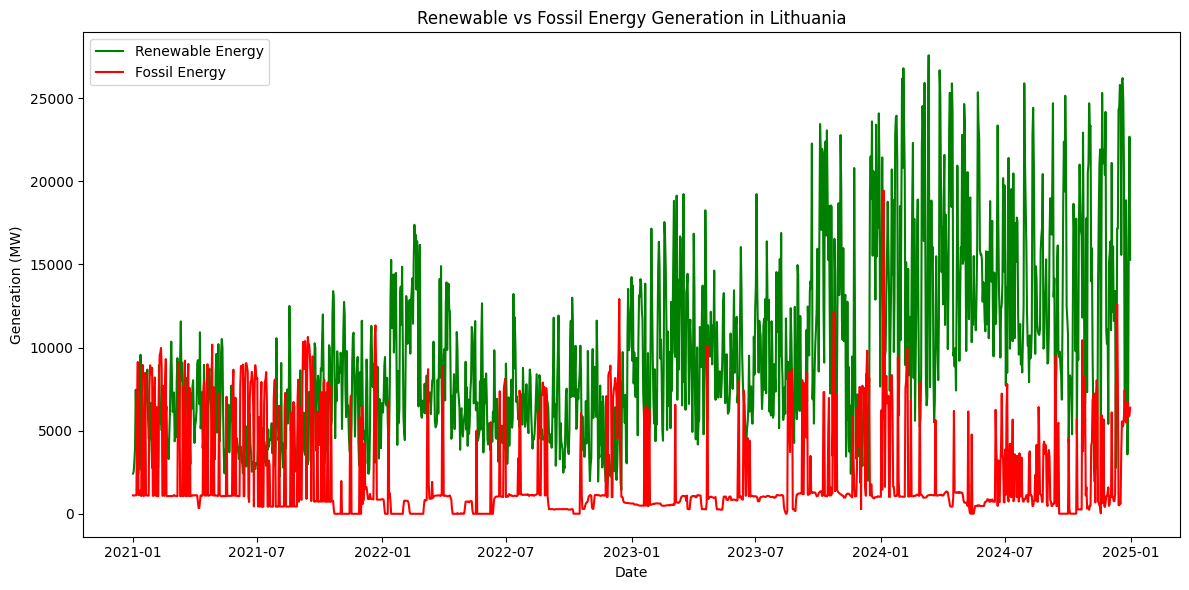

In [93]:
lt_df= generation_df[generation_df["Area"] == "Lithuania"]
renewable_types = ['Solar', 'Wind Onshore', 'Biomass', 'Hydro Run-of-river and poundage']
fossil_types = ['Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Oil shale', 'Fossil Peat']

# Filter data for renewable and fossil generation types
renewable_df = lt_df[lt_df['Production Type'].isin(renewable_types)]
fossil_df = lt_df[lt_df['Production Type'].isin(fossil_types)]

# Summarize generation data by date
renewable_sum = renewable_df.groupby('MTU')['Generation (MW)'].sum()
fossil_sum = fossil_df.groupby('MTU')['Generation (MW)'].sum()

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(renewable_sum, label='Renewable Energy', color='green')
plt.plot(fossil_sum, label='Fossil Energy', color='red')
plt.title('Renewable vs Fossil Energy Generation in Lithuania')
plt.xlabel('Date')
plt.ylabel('Generation (MW)')
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
all_countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Datetime (UTC)                              4383 non-null   datetime64[ns]
 1   Country                                     4383 non-null   object        
 2   Zone name                                   4383 non-null   object        
 3   Zone id                                     4383 non-null   object        
 4   Carbon intensity gCO‚ÇÇeq/kWh (direct)      4383 non-null   float64       
 5   Carbon intensity gCO‚ÇÇeq/kWh (Life cycle)  4383 non-null   float64       
 6   Carbon-free energy percentage (CFE%)        4383 non-null   float64       
 7   Renewable energy percentage (RE%)           4383 non-null   float64       
 8   Data source                                 4383 non-null   object        
dtypes: dateti

In [37]:
lithuania_2021.head()

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO‚ÇÇeq/kWh (direct),Carbon intensity gCO‚ÇÇeq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
0,2021-01-01,Lithuania,Lithuania,LT,243.16,332.29,43.87,31.68,entsoe.eu
1,2021-01-02,Lithuania,Lithuania,LT,251.96,338.17,42.17,31.40,entsoe.eu
2,2021-01-03,Lithuania,Lithuania,LT,196.95,277.60,50.55,34.01,entsoe.eu
3,2021-01-04,Lithuania,Lithuania,LT,216.91,294.03,51.60,39.65,entsoe.eu
4,2021-01-05,Lithuania,Lithuania,LT,232.78,309.09,50.96,41.48,entsoe.eu


In [29]:
df_2021.head()

,,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%)
2021-01-01 00:00:00,Estonia,Estonia,EE,236.34,290.34,64.53,40.08,entsoe.eu
2021-01-02 00:00:00,Estonia,Estonia,EE,278.44,333.54,60.28,37.84,entsoe.eu
2021-01-03 00:00:00,Estonia,Estonia,EE,259.36,314.01,62.12,39.38,entsoe.eu
2021-01-04 00:00:00,Estonia,Estonia,EE,356.07,410.65,49.19,30.82,entsoe.eu
2021-01-05 00:00:00,Estonia,Estonia,EE,382.41,431.06,45.09,28.40,entsoe.eu


In [28]:
print(df_2021.columns)  # To see all column names and check for any duplicates


Index(['Datetime (UTC)', 'Country', 'Zone name', 'Zone id',
       'Carbon intensity gCO₂eq/kWh (direct)',
       'Carbon intensity gCO₂eq/kWh (Life cycle)',
       'Carbon-free energy percentage (CFE%)'],
      dtype='object')


In [26]:
print(df_2021.iloc[:, 0])  # 0 for the first column


2021-01-01 00:00:00  Estonia    Estonia
2021-01-02 00:00:00  Estonia    Estonia
2021-01-03 00:00:00  Estonia    Estonia
2021-01-04 00:00:00  Estonia    Estonia
2021-01-05 00:00:00  Estonia    Estonia
                                 ...   
2021-12-27 00:00:00  Estonia    Estonia
2021-12-28 00:00:00  Estonia    Estonia
2021-12-29 00:00:00  Estonia    Estonia
2021-12-30 00:00:00  Estonia    Estonia
2021-12-31 00:00:00  Estonia    Estonia
Name: Datetime (UTC), Length: 365, dtype: object


In [19]:
df_2021.head()

,,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
2021-01-01 00:00:00,Estonia,Estonia,EE,236.34,290.34,64.53,40.08,entsoe.eu,NaN,NaN
2021-01-02 00:00:00,Estonia,Estonia,EE,278.44,333.54,60.28,37.84,entsoe.eu,NaN,NaN
2021-01-03 00:00:00,Estonia,Estonia,EE,259.36,314.01,62.12,39.38,entsoe.eu,NaN,NaN
2021-01-04 00:00:00,Estonia,Estonia,EE,356.07,410.65,49.19,30.82,entsoe.eu,NaN,NaN
2021-01-05 00:00:00,Estonia,Estonia,EE,382.41,431.06,45.09,28.40,entsoe.eu,NaN,NaN


In [15]:
df1.head()

,,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source
2021-01-01 00:00:00,Estonia,Estonia,EE,236.34,290.34,64.53,40.08,entsoe.eu,NaN,NaN
2021-01-02 00:00:00,Estonia,Estonia,EE,278.44,333.54,60.28,37.84,entsoe.eu,NaN,NaN
2021-01-03 00:00:00,Estonia,Estonia,EE,259.36,314.01,62.12,39.38,entsoe.eu,NaN,NaN
2021-01-04 00:00:00,Estonia,Estonia,EE,356.07,410.65,49.19,30.82,entsoe.eu,NaN,NaN
2021-01-05 00:00:00,Estonia,Estonia,EE,382.41,431.06,45.09,28.40,entsoe.eu,NaN,NaN


In [10]:
df_carbon_all = pd.concat([df1, df2, df3, df4])

In [11]:
df_carbon_all['Datetime (UTC)'] = pd.to_datetime(df_carbon_all['Datetime (UTC)'])
df_all = df_carbon_all.sort_values(by='Datetime (UTC)').reset_index(drop=True)


DateParseError: Unknown datetime string format, unable to parse: Estonia, at position 0

In [12]:
with open("/Users/sadhvinarayanan/5c-Datathon-2025/carbon-neutral/EE_2021_daily.csv") as f:
    for _ in range(5):
        print(f.readline())


Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source

2021-01-01 00:00:00,Estonia,Estonia,EE,236.34,290.34,64.53,40.08,entsoe.eu,,

2021-01-02 00:00:00,Estonia,Estonia,EE,278.44,333.54,60.28,37.84,entsoe.eu,,

2021-01-03 00:00:00,Estonia,Estonia,EE,259.36,314.01,62.12,39.38,entsoe.eu,,

2021-01-04 00:00:00,Estonia,Estonia,EE,356.07,410.65,49.19,30.82,entsoe.eu,,

